# Your info

Full name:mohammmad yarmoghadam

Student ID:96462104

# Q1. Perceptron

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i , self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

def main():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], np.int32)
    y = np.array([1, 0 , 0, 0], np.int32)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    print(p.weights)
    print(p.bias)
    

if __name__ == "__main__":
    main()


[-0.01 -0.01]
0.0


In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# Q2. Binary Classification

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.model_selection import train_test_split

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i , self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

Perceptron classification accuracy 0.875


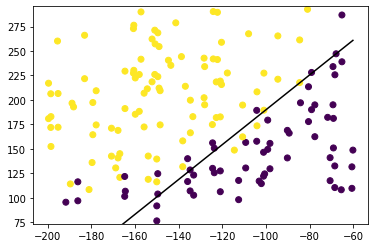

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def main():
    t = np.loadtxt(
        fname = './gdrive/MyDrive/Colab Notebooks/data.txt',
        dtype = np.float,
        delimiter=','
    )
    data = t[:, 0:2]
    label = t[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=0.2, random_state=123)
    p = Perceptron(learning_rate=0.01, n_iters=15000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    print("Perceptron classification accuracy", accuracy(y_test, predictions))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)
    x0_1 = np.amin(X_train[:,0])
    x0_2 = np.amax(X_train[:,0])
    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]
    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')
    ymin = np.amin(X_train[:,1])
    ymax = np.amax(X_train[:,1])
    ax.set_ylim([ymin-3,ymax+3])
    plt.show()



if __name__ == "__main__":
    main()



# Q4. MLP

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]
input_size = image_size * image_size
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
batch_size = 128
hidden_units = 256
dropout = 0.45
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7519 - accuracy: 0.7585
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2044 - accuracy: 0.9385
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1579 - accuracy: 0.9544
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1310 - accuracy: 0.9602
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1093 - accuracy: 0.9671
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0991 - accuracy: 0.9691
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0969 - accuracy: 0.9700
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0840 - accuracy: 0.9738
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0793 - accuracy: 0.9756
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0761 - accuracy: 0.9760

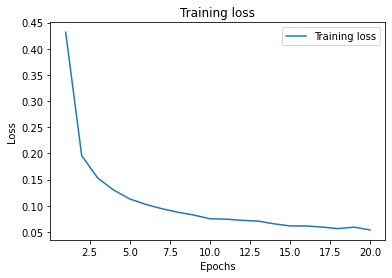

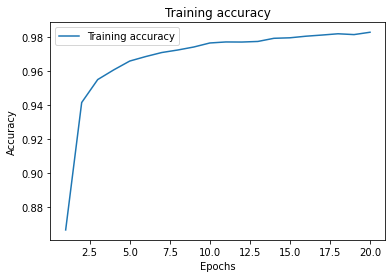

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.
epochs = range(1,21)
loss = history.history['loss']
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,21)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Q5. Back-Propagation

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.s
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

class DeepNeuralNetwork():
    def __init__(self, sizes, epochs=10, l_rate=0.001):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate
        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x, derivative=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)

    def initialization(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        hidden_2=self.sizes[2]
        output_layer=self.sizes[3]
        params = {'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
                  'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
                  'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)}
        return params

    def forward_pass(self, x_train):
        params = self.params
        # input layer activations becomes sample
        params['A0'] = x_train
        # input layer to hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])
        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])
        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])
        return params['A3']

    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}
        # Calculate W3 update
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])
        # Calculate W2 update
        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])
        # Calculate W1 update
        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])
        return change_w

    def update_network_parameters(self, changes_to_w): 
        for key, value in changes_to_w.items():
            self.params[key] -= self.l_rate * value

    def compute_accuracy(self, x_val, y_val):
        predictions = []
        for x, y in zip(x_val, y_val):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        return np.mean(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        start_time = time.time()
        for iteration in range(self.epochs):
            for x,y in zip(x_train, y_train):
                output = self.forward_pass(x)
                changes_to_w = self.backward_pass(y, output)
                self.update_network_parameters(changes_to_w)
            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration+1, time.time() - start_time, accuracy * 100
            ))
            
dnn = DeepNeuralNetwork(sizes=[784, 128, 64, 10])
dnn.train(x_train, y_train, x_val, y_val)

Epoch: 1, Time Spent: 51.83s, Accuracy: 27.50%
Epoch: 2, Time Spent: 103.59s, Accuracy: 32.94%
Epoch: 3, Time Spent: 155.19s, Accuracy: 37.56%
Epoch: 4, Time Spent: 206.77s, Accuracy: 41.49%
Epoch: 5, Time Spent: 258.24s, Accuracy: 43.93%
Epoch: 6, Time Spent: 309.92s, Accuracy: 46.02%
Epoch: 7, Time Spent: 361.79s, Accuracy: 48.13%
Epoch: 8, Time Spent: 413.73s, Accuracy: 51.17%
Epoch: 9, Time Spent: 465.35s, Accuracy: 53.99%
Epoch: 10, Time Spent: 517.04s, Accuracy: 56.43%


In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.